In [10]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20190104'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train","test","train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2019-01-04,1.0,3,test,foo
1,1.0,2019-01-04,1.0,3,train,foo
2,1.0,2019-01-04,1.0,3,test,foo
3,1.0,2019-01-04,1.0,3,train,foo


In [11]:
df2.dtypes


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [26]:
# Viewing data
df.head()
df.tail(3)
df.index
df.columns
#df2.to_numpy()
df.describe()
df.T
df.sort_index(axis=1, ascending=False)
df.sort_values(by='B')

,A,B,C,D
2018-12-15,-2.349933,-1.480702,1.181045,-0.254594
2018-12-18,0.367804,-1.075591,-1.732837,1.171032
2018-12-17,-1.193124,-0.478675,-0.477896,0.597043
2018-12-16,0.909008,0.450257,-1.099802,-0.287046
2018-12-14,0.892664,1.296119,-0.338213,0.585193
2018-12-19,-0.357276,1.725301,0.437197,-2.035714


In [36]:
#...SELECTION

#getting
df['A']
df[0:3]
df['20181214': '20181215']

#selection by label
df.loc[dates[0]]
df.loc[:, ['A','B']]
df.loc['20181214':'20181217',['A','B']]
df.loc[dates[0], 'A']
df.at[dates[0], 'A']

0.8926637906248018

In [47]:
# selection by position
df.iloc[3]
# integer slices
df.iloc[3:5, 0:2]

df.iloc[[1,2,4], [0,2]]

df.iloc[1:3, :]
df.iloc[:, 1:3]
df.iloc[1, 1]
df.iat[1,1]
df[df.A > 0]
df[df > 0]
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2018-12-16,0.909008,0.450257,-1.099802,-0.287046,two
2018-12-18,0.367804,-1.075591,-1.732837,1.171032,four


In [52]:
# setting
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20190405',periods=6))
s1
df['F'] = s1
df.at[dates[0], 'A'] = 0
df.iat[0, 1] = 0
df.loc[:, 'D'] = np.array([5] * len(df))
df2 = df.copy()
df[df2 > 0] = -df2
df2

,A,B,C,D,F
2018-12-14,0.000000,0.000000,-0.338213,5,NaN
2018-12-15,-2.349933,-1.480702,1.181045,5,NaN
2018-12-16,0.909008,0.450257,-1.099802,5,NaN
2018-12-17,-1.193124,-0.478675,-0.477896,5,NaN
2018-12-18,0.367804,-1.075591,-1.732837,5,NaN
2018-12-19,-0.357276,1.725301,0.437197,5,NaN


In [58]:
#.. missing data
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

df1.dropna(how='any')
df1.fillna(value=5)
pd.isna(df1)

,A,B,C,D,F,E
2018-12-14,False,False,False,False,True,False
2018-12-15,False,False,False,False,True,False
2018-12-16,False,False,False,False,True,True
2018-12-17,False,False,False,False,True,True


In [60]:
# OPERATIONS...
#stats
df.mean()
df.mean(1)

2018-12-14   -1.334553
2018-12-15   -2.502920
2018-12-16   -1.864767
2018-12-17   -1.787424
2018-12-18   -2.044058
2018-12-19   -1.879943
Freq: D, dtype: float64

In [62]:
s = pd.Series([1,3,5,np.nan, 6,8], index=dates).shift(2)
s

2018-12-14    NaN
2018-12-15    NaN
2018-12-16    1.0
2018-12-17    3.0
2018-12-18    5.0
2018-12-19    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2018-12-14,NaN,NaN,NaN,NaN,NaN
2018-12-15,NaN,NaN,NaN,NaN,NaN
2018-12-16,-1.909008,-1.450257,-2.099802,-6.0,NaN
2018-12-17,-4.193124,-3.478675,-3.477896,-8.0,NaN
2018-12-18,-5.367804,-6.075591,-6.732837,-10.0,NaN
2018-12-19,NaN,NaN,NaN,NaN,NaN


In [64]:
# Apply
df.apply(np.cumsum)

,A,B,C,D,F
2018-12-14,0.000000,0.000000,-0.338213,-5,NaN
2018-12-15,-2.349933,-1.480702,-1.519257,-10,NaN
2018-12-16,-3.258941,-1.930959,-2.619059,-15,NaN
2018-12-17,-4.452065,-2.409634,-3.096955,-20,NaN
2018-12-18,-4.819870,-3.485224,-4.829792,-25,NaN
2018-12-19,-5.177146,-5.210525,-5.266989,-30,NaN


In [65]:
df.apply(lambda x: x.max() - x.min())

A    2.349933
B    1.725301
C    1.394624
D    0.000000
F         NaN
dtype: float64

In [68]:
# Histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

4    3
1    3
6    1
5    1
3    1
2    1
dtype: int64

In [69]:
#string methods
s =pd.Series(['A','B','C','Aaba', 'Baca', np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [71]:
#  Merge....
df = pd.DataFrame(np.random.randn(10,4))
df
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.740905,0.571025,-1.149862,-2.003069
1,1.494252,0.420724,-1.265997,-0.981396
2,-0.757629,0.674442,1.407313,0.980548
3,-0.670252,0.733678,1.048333,-1.033583
4,1.625317,0.149858,-1.225338,1.624993
5,-0.472635,3.490214,-0.515621,0.250862
6,1.592792,-0.613987,1.407653,-1.294671
7,1.769346,-0.659059,0.958453,3.683873
8,2.171208,-0.058981,-1.693835,0.107886
9,-1.627762,0.431952,-0.179131,-0.689881


In [74]:
#..Join
left = pd.DataFrame({'key':['foo','foo'], 'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'], 'rval':[4,5]})
left
right
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,2,4


In [75]:
# Append
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.388629,1.021669,0.994379,-1.034658
1,2.675764,2.169172,0.176205,-1.228047
2,-0.366614,-1.663329,0.252963,0.270174
3,-1.699576,-0.346133,0.215182,-1.103827
4,0.945536,-0.205973,-1.416745,-0.499929
5,-0.376133,-0.552735,0.719025,1.550409
6,1.984399,0.296694,2.680192,0.252814
7,0.294040,0.535854,0.055699,-0.411286


In [76]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.388629,1.021669,0.994379,-1.034658
1,2.675764,2.169172,0.176205,-1.228047
2,-0.366614,-1.663329,0.252963,0.270174
3,-1.699576,-0.346133,0.215182,-1.103827
4,0.945536,-0.205973,-1.416745,-0.499929
5,-0.376133,-0.552735,0.719025,1.550409
6,1.984399,0.296694,2.680192,0.252814
7,0.294040,0.535854,0.055699,-0.411286
8,-1.699576,-0.346133,0.215182,-1.103827


In [14]:
import pandas as pd
import numpy as np
# Grouping...
df = pd.DataFrame({'A':['foo', 'bar','foo','bar','foo','bar','foo','foo'],'B':['one','one','two','three','two','two','one','three'],'C': np.random.randn(8),'D': np.random.randn(8)})
df

df.groupby('A').sum()
df.groupby(['A','B']).sum()

# reshaping
tuples= list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
df = pd.DataFrame(np.random.randn(8,2), index = index, columns=['A','B'])
df2 = df[:4]
df2

stacked = df2.stack()
stacked

stacked.unstack()
stacked.unstack(1)
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.005408 -2.021680
       B  0.314053 -0.015471
two    A -0.804623  0.618459
       B -1.404443  1.366388

In [16]:
#.. pivot tables
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,'B': ['A', 'B', 'C'] * 4,'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,'D': np.random.randn(12),'E': np.random.randn(12)})
df

pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])


C             bar       foo
A     B                    
one   A  0.241786  0.789621
      B -0.502860 -0.885301
      C  0.340294 -0.299414
three A -0.649656       NaN
      B       NaN -0.994102
      C  1.765941       NaN
two   A       NaN  1.380991
      B -0.055640       NaN
      C       NaN  0.672894

In [17]:
# Times Series
rng = pd.date_range('1/1/2018', periods=100, freq='S')
ts = pd.Series(np.random.randint(0,500, len(rng)), index=rng)
ts.resample('5Min').sum()

2018-01-01    23996
Freq: 5T, dtype: int32

In [24]:
rng = pd.date_range('3/6/2019 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

ts_utc = ts.tz_localize('UTC')
ts_utc

ts_utc.tz_convert('US/Eastern')

rng = pd.date_range('1/1/2020', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

ps = ts.to_period()
ps

ps.to_timestamp()

prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M','e')+ 1).asfreq('H', 's')+9
ts.head()

1990-03-01 09:00    0.344856
1990-06-01 09:00    0.356712
1990-09-01 09:00    0.034098
1990-12-01 09:00    1.179723
1991-03-01 09:00   -0.868234
Freq: H, dtype: float64

In [30]:
# categoricals
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a','b','b','a','a','e']})
df["grade"]= df["raw_grade"].astype("category")
df["grade"]

df["grade"].cat.categories = ["very good","good","very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad","medium","god", "very good"])
df["grade"]

df.sort_values(by="grade")
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
god          0
very good    3
dtype: int64

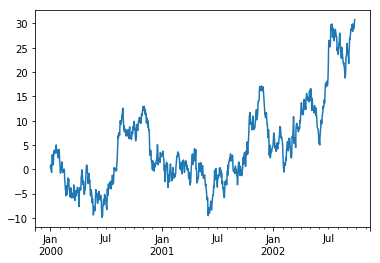

In [34]:
# plotting
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

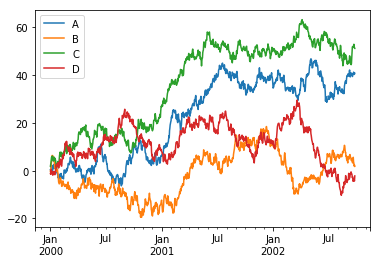

In [38]:
df = pd.DataFrame(np.random.randn(1000, 4), index= ts.index, columns=['A','B','C','D'])
df = df.cumsum()
#plt.figure()
df.plot()
#plt.legend(loc='best')


In [39]:
#... Getting Data In/Out
#_writing
df.to_csv('foo.csv')
#_reading
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.439197,-0.242862,1.906739,-1.127882
1,2000-01-02,-0.113873,0.649466,2.655451,-1.525703
2,2000-01-03,1.163979,1.256538,3.441495,0.441011
3,2000-01-04,1.934717,3.698142,4.958041,0.344366
4,2000-01-05,0.666114,3.728578,5.785427,-1.128437
5,2000-01-06,0.937621,5.844689,5.161441,-0.226807
6,2000-01-07,2.005215,6.407288,5.943923,-1.283252
7,2000-01-08,0.114967,5.878465,6.128181,-1.547142
8,2000-01-09,1.843130,5.972905,4.575334,-1.882827
9,2000-01-10,1.809182,6.066768,4.218334,-0.433886


In [41]:
#__HDF5:: reading and writing to HDFStores
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.439197,-0.242862,1.906739,-1.127882
2000-01-02,-0.113873,0.649466,2.655451,-1.525703
2000-01-03,1.163979,1.256538,3.441495,0.441011
2000-01-04,1.934717,3.698142,4.958041,0.344366
2000-01-05,0.666114,3.728578,5.785427,-1.128437
2000-01-06,0.937621,5.844689,5.161441,-0.226807
2000-01-07,2.005215,6.407288,5.943923,-1.283252
2000-01-08,0.114967,5.878465,6.128181,-1.547142
2000-01-09,1.843130,5.972905,4.575334,-1.882827
2000-01-10,1.809182,6.066768,4.218334,-0.433886


In [42]:
#__EXcel__
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])


,A,B,C,D
2000-01-01,0.439197,-0.242862,1.906739,-1.127882
2000-01-02,-0.113873,0.649466,2.655451,-1.525703
2000-01-03,1.163979,1.256538,3.441495,0.441011
2000-01-04,1.934717,3.698142,4.958041,0.344366
2000-01-05,0.666114,3.728578,5.785427,-1.128437
2000-01-06,0.937621,5.844689,5.161441,-0.226807
2000-01-07,2.005215,6.407288,5.943923,-1.283252
2000-01-08,0.114967,5.878465,6.128181,-1.547142
2000-01-09,1.843130,5.972905,4.575334,-1.882827
2000-01-10,1.809182,6.066768,4.218334,-0.433886


In [46]:
#__essential basic_functionality
index = pd.date_range('2/2/2010', periods=8)
index

s = pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
s

df = pd.DataFrame(np.random.randn(8,3), index= index, columns=['A','B','C'])
df

wp = pd.Panel(np.random.randn(2,5,4), items=['Item1','Item2'], major_axis=pd.date_range('1/5/2010', periods=5), minor_axis=['A','B','C','D'])
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2010-01-05 00:00:00 to 2010-01-09 00:00:00
Minor_axis axis: A to D

In [48]:
#__Head_and Tail__
long_series = pd.Series(np.random.randn(1000))
long_series.head()
long_series.tail(3)

997    1.035521
998    1.289705
999   -0.154384
dtype: float64

In [50]:
#_attributes and underlying data
df[:3]

df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2010-02-02,0.449012,0.357760,-1.947615
2010-02-03,-0.859272,-1.148021,0.491592
2010-02-04,-2.502769,-0.576204,0.696809
2010-02-05,1.901654,0.510604,-1.826124
2010-02-06,-0.133669,0.098364,0.129411
2010-02-07,-1.755648,-0.183952,0.491110
2010-02-08,-0.406267,0.253110,-0.546040
2010-02-09,-2.170738,1.939610,-1.488400


In [59]:
ser = pd.Series(pd.date_range('2000', periods=2, tz="CET"))
ser
 

0   2000-01-01 00:00:00+01:00
1   2000-01-02 00:00:00+01:00
dtype: datetime64[ns, CET]

In [ ]:
# accelerated operations__pg_98
